In [243]:
import pandas as pd

### 1: Load the data

In [244]:
df = pd.read_csv('Titanic-Dataset.csv')

In [245]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 2: Handle the null values

In [246]:
df['Cabin'].fillna('NA', inplace = True)

In [247]:
X_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
y_cols = ['Survived']

In [253]:
df2 = df[X_cols + y_cols]

In [254]:
df2.dropna(inplace = True, axis = 0)

/tmp/ipykernel_19480/420888182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace = True, axis = 0)


#### 1. In the times of crisis, women and children are given higher priority over men by the rescue teams
#### 2. Economic status of a person is also a good indicator about the survival status of a person.

### 3: Converting text data into numbers

In [255]:
from sklearn.preprocessing import OrdinalEncoder

In [256]:
enc = OrdinalEncoder()

In [257]:
text_columns = ['Sex', 'Ticket', 'Cabin', 'Embarked']

In [269]:
for i in text_columns:
    enc = enc.fit(df2[[i]])
    df2[i] = enc.transform(df2[[i]])

/tmp/ipykernel_19480/3782195017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i] = enc.transform(df2[[i]])
/tmp/ipykernel_19480/3782195017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i] = enc.transform(df2[[i]])
/tmp/ipykernel_19480/3782195017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [273]:
X = df2[X_cols]
y = df2[y_cols]

### 4: Creating DataFrames For Training and Testing

In [274]:
from sklearn.model_selection import train_test_split

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5: Building Decision Tree

In [279]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

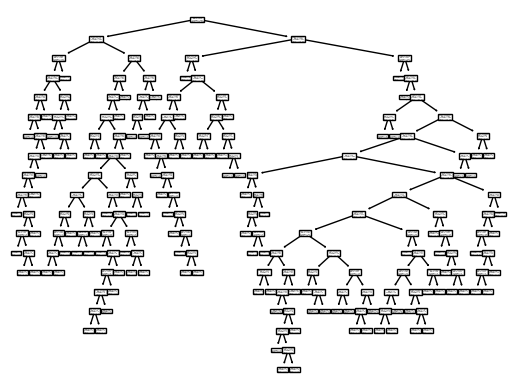

In [281]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

_ = plot_tree(dtree, feature_names=X_cols) 